In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [31]:
df = pd.read_csv('clean.csv')
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,55811.563107
std,3.017430,43.573030,126.014444,29.566839,34134.665280
min,2.100000,123.000000,95.000000,104.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,215000.000000


In [32]:
df.replace('-', np.nan, inplace=True)
df.dropna(inplace=True)
df = df.astype(float)

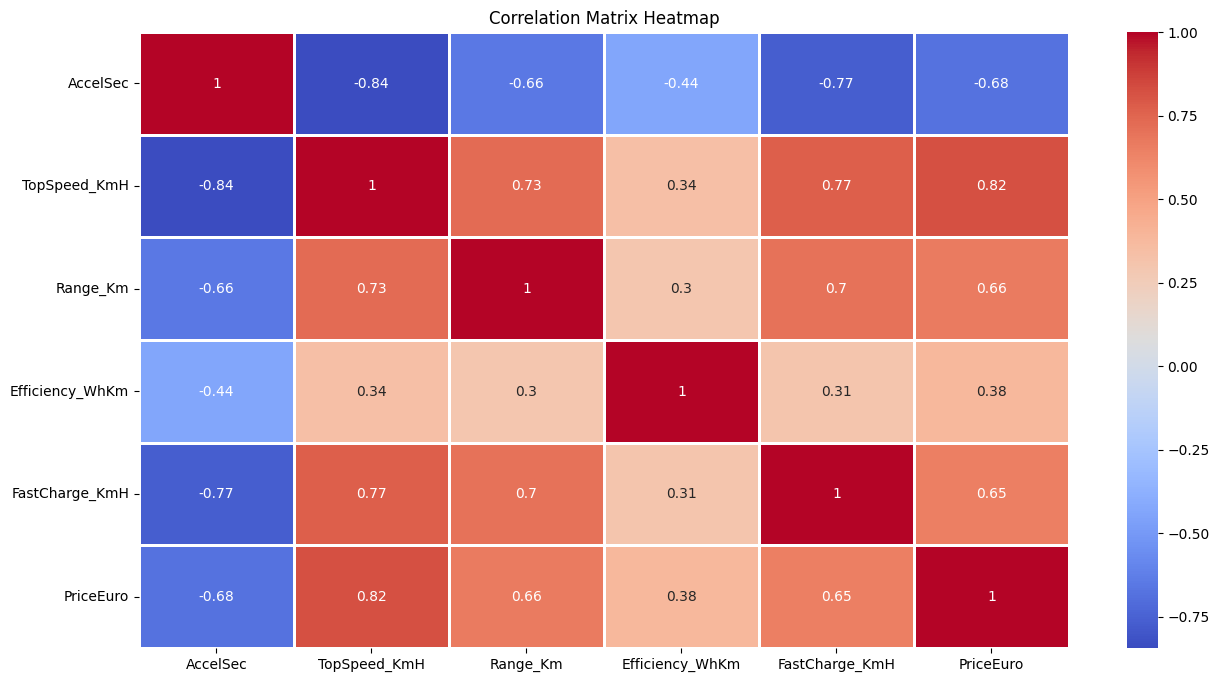

In [33]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Optionally, drop rows with missing values
numeric_df = numeric_df.dropna()

# Now create the heatmap
plt.figure(figsize=(15, 8))
heatmap = sb.heatmap(numeric_df.corr(), linewidths=1, linecolor='white', annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [46]:
x = df[['AccelSec', 'TopSpeed_KmH', 'Efficiency_WhKm', 'FastCharge_KmH','Range_Km']]
y = df['PriceEuro']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}, R^2: {r2}')

MSE: 163566859.65930036, R^2: 0.7657383429245086


In [49]:
new_data = pd.DataFrame([[4.6,233,161,940,450]], columns=['AccelSec', 'TopSpeed_KmH', 'Efficiency_WhKm', 'FastCharge_KmH','Range_Km'])
predicted_price = model.predict(new_data)
print(predicted_price)

[90878.93324538]
